In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings

# Suppress SettingWithCopyWarning
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)



In [38]:
data = pd.read_csv("drug.csv")

# Check whether there are missing values
missing_values = data.isnull().sum()
print('Missing values:\n', missing_values)

print('----------------------')

Missing values:
 Age            0
Sex            0
BP             2
Cholesterol    2
Na_to_K        1
Drug           0
dtype: int64
----------------------


In [39]:
# Check the type of each feature (categorical or numerical)
data_types = data.dtypes
print('Data types:\n', data_types)

print('----------------------')
print('First experiment:')

Data types:
 Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object
----------------------
First experiment:


In [40]:
# Records containing missing values are filled
data.loc[:, ["Age", "Na_to_K"]] = data[["Age", "Na_to_K"]].fillna(data[["Age", "Na_to_K"]].mean())


# For categorical columns
for column_name in data.columns:
    if data[column_name].dtype == 'object':
        data[column_name].fillna(data[column_name].mode()[0], inplace=True)

In [42]:
# categorical features and targets are encoded
label_encoder = LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == 'object':
        data.loc[:, column_name] = label_encoder.fit_transform(data.loc[:, column_name])

x = data.drop(columns=['Drug'])
y = data['Drug']  # Update to use a Series for the target

y=label_encoder.fit_transform(y)

In [43]:
# Number of experiments
num_experiments = 5

# Initialize lists to store accuracy values and size of trees
accuracy_values = []
tree_sizes = []

In [44]:
#First experiment
for i in range(num_experiments):
    # Split the data into training and testing sets with different random states
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    
    # train the Decision Tree
    model = tree.DecisionTreeClassifier(criterion="gini")
    model.fit(x_train, y_train)

    # Get the size of the decision tree
    tree_size = model.tree_.node_count
    tree_sizes.append(tree_size)
    print(f"Experiment {i + 1} - Decision Tree Size: {tree_size}")

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate accuracy
    accuracy = model.score(x_test, y_test)
    accuracy_values.append(accuracy)
    print(f"Experiment {i + 1} - accuracy: {accuracy:.4f}")

Experiment 1 - Decision Tree Size: 11
Experiment 1 - accuracy: 0.9667
Experiment 2 - Decision Tree Size: 15
Experiment 2 - accuracy: 0.9833
Experiment 3 - Decision Tree Size: 15
Experiment 3 - accuracy: 0.9833
Experiment 4 - Decision Tree Size: 15
Experiment 4 - accuracy: 0.9167
Experiment 5 - Decision Tree Size: 15
Experiment 5 - accuracy: 0.9667


In [45]:
# Find the index of the experiment with the Max accuracy
best_experiment_index = np.argmax(accuracy_values)
best_accuracy = accuracy_values[best_experiment_index]
best_tree_size = tree_sizes[best_experiment_index]

# Print results
print(f"\nBest Model (Experiment {best_experiment_index + 1}):")
print(f"Max accuracy: {best_accuracy:.4f}")
print(f"Decision Tree Size: {best_tree_size}")

print('----------------------')


Best Model (Experiment 2):
Max accuracy: 0.9833
Decision Tree Size: 15
----------------------


In [46]:
print('Second experiment:')


mean_accuracies = []
mean_trees_size = []
split_ratios = np.arange(0.3, 0.8, 0.1)
columns = ['split_ratio','mean_accuracy', 'max_accuracy', 'min_accuracy','mean_tree_size', 'max_tree_size', 'min_tree_size']
report_df = pd.DataFrame(columns=columns)

Second experiment:


In [47]:
#Second experiment
for split_ratio in split_ratios:
    # Initialize lists to store results for each ratio
    accuracy_values = []
    tree_sizes = []

    for i in range(num_experiments):
        # Split the data into training and testing sets 
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - split_ratio)

        # train the Decision Tree
        model = tree.DecisionTreeClassifier(criterion="gini")
        model.fit(x_train, y_train)
        
        # Get the size of the decision tree
        tree_size = model.tree_.node_count
        tree_sizes.append(tree_size)

        # Calculate accuracy
        accuracy = model.score(x_test, y_test)
        accuracy_values.append(accuracy)

    #Calculate the mean, maximum, and minimum accuracy at each training set size.
    mean_accuracy=np.mean(accuracy_values)
    max_accuracy=max(accuracy_values)
    min_accuracy = min(accuracy_values)

    #Measure the mean, maximum, and minimum tree size.
    mean_tree_size = np.mean(tree_sizes)
    max_tree_size = max(tree_sizes)
    min_tree_size = min(tree_sizes)

    #Save mean_accuracy and mean_tree_size
    mean_accuracies.append(mean_accuracy)
    mean_trees_size.append(mean_tree_size)

    #Add Data to report
    record = pd.DataFrame({
        'split_ratio': [split_ratio],
        'mean_accuracy':[mean_accuracy],
        'max_accuracy':[max_accuracy],
        'min_accuracy':[min_accuracy],
        'mean_tree_size':[mean_tree_size],
        'max_tree_size':[max_tree_size],
        'min_tree_size':[min_tree_size]
    })
    if report_df.empty:
        report_df = record.copy()
    else:
        report_df = pd.concat([report_df, record], ignore_index=True)

   split_ratio  mean_accuracy  max_accuracy  min_accuracy  mean_tree_size  \
0          0.3       0.974286      0.992857      0.942857            13.4   
1          0.4       0.973333      0.983333      0.950000            13.8   
2          0.5       0.982000      0.990000      0.960000            13.4   
3          0.6       0.985000      0.987500      0.975000            15.0   
4          0.7       0.980000      1.000000      0.950000            15.0   

   max_tree_size  min_tree_size  
0             15             11  
1             17             11  
2             15             11  
3             15             15  
4             15             15  


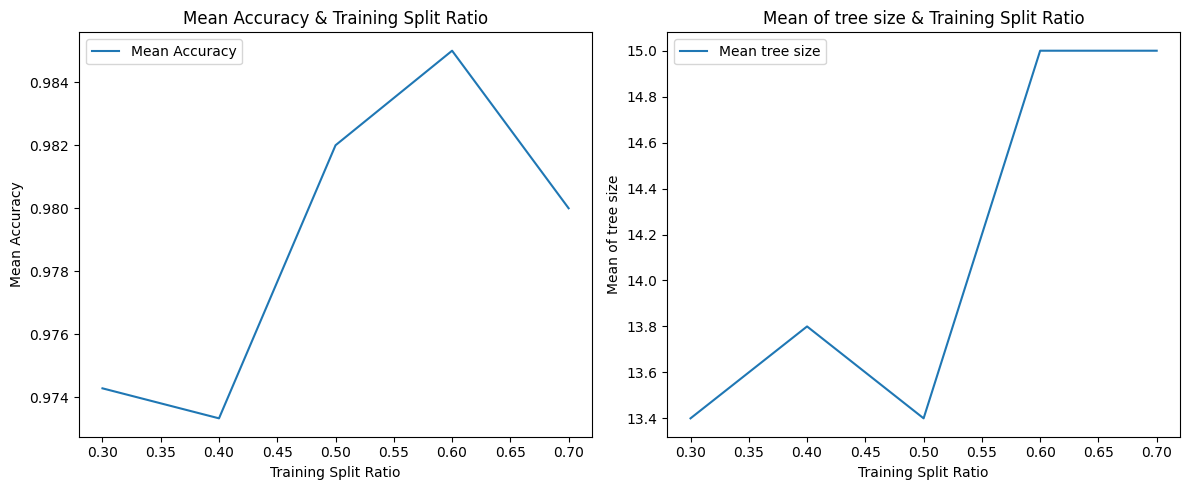

In [48]:
#print report
print(report_df)

# Create two plots
plt.figure(figsize=(12, 5))

# Plot accuracy against set size
plt.subplot(1, 2, 1)
plt.plot(split_ratios, mean_accuracies, label='Mean Accuracy')
plt.title('Mean Accuracy & Training Split Ratio')
plt.xlabel('Training Split Ratio')
plt.ylabel('Mean Accuracy')
plt.legend()


# Plot number of nodes in the final tree against set size
plt.subplot(1, 2, 2)
plt.plot(split_ratios, mean_trees_size, label='Mean tree size')
plt.title('Mean of tree size & Training Split Ratio')
plt.xlabel('Training Split Ratio')
plt.ylabel('Mean of tree size')
plt.legend()

plt.tight_layout()
plt.show()